# Surrogate Outcomes

In [1]:
from y0.dsl import D, W, X, Y, Z, Sum, Product, P, Variable, Pi1, Pi2
from y0.graph import NxMixedGraph
from y0.algorithm.identify import identify_outcomes
from y0.algorithm.transport import identify_target_outcomes
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

## Cancer

The first scenario we will explore is about the relationship between smoking ($S$), accumulation of tar in the lungs ($T$), and cancer ($C$). 

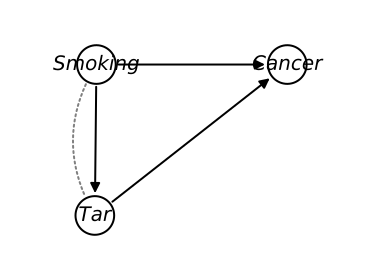

In [2]:
Smoking, Tar, Cancer = (Variable(n) for n in ("Smoking", "Tar", "Cancer"))

graph = NxMixedGraph.from_edges(
    directed=[(Smoking, Tar), (Tar, Cancer), (Smoking, Cancer)], undirected=[(Smoking, Tar)]
)
graph.draw()

Suppose Pall Mall has a new cigarette that has no tar in it!  They conduct a clinical trial $\pi_1$ where they randomly assign some volunteers to smoke their new cigarette, and the other volunteers receive regular cigarettes. As an outcome, they measure tar buildup in the lungs, but unfortunately, the trial is stopped before any of the volunteers get cancer. This trial does not have enough information to estimate the causal effect of smoking on cancer $P^{\pi_1}(Cancer | \text{do}(Smoking))$ from the measurements of $P^{\pi_1}(Tar | \text{do}(Smoking)$.

In [3]:
identify_outcomes(graph, treatments={Smoking}, outcomes={Cancer}) is None

True

 At the same time, we have observational data over many years that show the correlation of smoking on cancer, but we don't know who chose the Pall Mall "no tar" cigarettes vs the tar-filled cigarettes.  This observational data does not have enough information to estimate $P^{\pi^\ast}(Cancer | \text{do}(Smoking)$ from the measurements of $P^{\pi^\ast}(Smoking, Cancer, Tar)$.

Neither dataset is sufficient to estimate the causal effect of smoking on cancer, but perhaps by combining the two, we can identify the query.
 

In [4]:
identify_target_outcomes(
    graph=graph,
    target_outcomes={Cancer},
    target_interventions={Smoking},
    surrogate_outcomes={Pi1: {Tar}},
    surrogate_interventions={Pi1: {Smoking}},
)

Sum[Tar](PP[π1][Smoking](Tar) * ((P(Cancer, Smoking, Tar) / P(Smoking, Tar))))

We can interpret this result as taking the observational data ($\pi^\ast$) such that the conditional $P(Cancer| Smoking, Tar)$ is stratified by Tar, and reweighting the percentage of people who have tar in their lungs by the percentage of people who had tar in their lungs in the clinical trial ($\pi_1$).  The summation over Tar means that the final estimate will only have Smoking and Cancer in it.  If you didn't do the reweighting, you would only recover the probability of cancer given smoking.

Note that the surrogate outcomes algorithm implicitly assumes that observational data from the target population is always available.

## Sunburn in Denver vs Miami.

In Miami, the UV per square meter is higher because the angle that the sun makes with the earth is nearly 90 degrees.
In Denver, the UV per square meter is higher because there is less ozone.